In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
def loss(phi0, phi1):
    height = np.exp(-0.5 * (phi1 * phi1)*4.0)
    height = height * np. exp(-0.5* (phi0-0.7) *(phi0-0.7)/4.0)
    return 1.0-height

# Compute the gradients of this function (for simplicity, I just used finite differences)
def get_loss_gradient(phi0, phi1):
    delta_phi = 0.00001;
    gradient = np.zeros((2,1));
    gradient[0] = (loss(phi0+delta_phi/2.0, phi1) - loss(phi0-delta_phi/2.0, phi1))/delta_phi
    gradient[1] = (loss(phi0, phi1+delta_phi/2.0) - loss(phi0, phi1-delta_phi/2.0))/delta_phi
    return gradient[:,0];

# Compute the loss function at a range of values of phi0 and phi1 for plotting
def get_loss_function_for_plot():
  grid_values = np.arange(-1.0,1.0,0.01);
  phi0mesh, phi1mesh = np.meshgrid(grid_values, grid_values)
  loss_function = np.zeros((grid_values.size, grid_values.size))
  for idphi0, phi0 in enumerate(grid_values):
      for idphi1, phi1 in enumerate(grid_values):
          loss_function[idphi0, idphi1] = loss(phi1,phi0)
  return loss_function, phi0mesh, phi1mesh

In [3]:
my_colormap_vals_hex =('2a0902', '2b0a03', '2c0b04', '2d0c05', '2e0c06', '2f0d07', '300d08', '310e09', '320f0a', '330f0b', '34100b', '35110c', '36110d', '37120e', '38120f', '39130f', '3a1410', '3b1411', '3c1511', '3d1612', '3e1613', '3f1713', '401714', '411814', '421915', '431915', '451a16', '461b16', '471b17', '481c17', '491d18', '4a1d18', '4b1e19', '4c1f19', '4d1f1a', '4e201b', '50211b', '51211c', '52221c', '53231d', '54231d', '55241e', '56251e', '57261f', '58261f', '592720', '5b2821', '5c2821', '5d2922', '5e2a22', '5f2b23', '602b23', '612c24', '622d25', '632e25', '652e26', '662f26', '673027', '683027', '693128', '6a3229', '6b3329', '6c342a', '6d342a', '6f352b', '70362c', '71372c', '72372d', '73382e', '74392e', '753a2f', '763a2f', '773b30', '783c31', '7a3d31', '7b3e32', '7c3e33', '7d3f33', '7e4034', '7f4134', '804235', '814236', '824336', '834437', '854538', '864638', '874739', '88473a', '89483a', '8a493b', '8b4a3c', '8c4b3c', '8d4c3d', '8e4c3e', '8f4d3f', '904e3f', '924f40', '935041', '945141', '955242', '965343', '975343', '985444', '995545', '9a5646', '9b5746', '9c5847', '9d5948', '9e5a49', '9f5a49', 'a05b4a', 'a15c4b', 'a35d4b', 'a45e4c', 'a55f4d', 'a6604e', 'a7614e', 'a8624f', 'a96350', 'aa6451', 'ab6552', 'ac6552', 'ad6653', 'ae6754', 'af6855', 'b06955', 'b16a56', 'b26b57', 'b36c58', 'b46d59', 'b56e59', 'b66f5a', 'b7705b', 'b8715c', 'b9725d', 'ba735d', 'bb745e', 'bc755f', 'bd7660', 'be7761', 'bf7862', 'c07962', 'c17a63', 'c27b64', 'c27c65', 'c37d66', 'c47e67', 'c57f68', 'c68068', 'c78169', 'c8826a', 'c9836b', 'ca846c', 'cb856d', 'cc866e', 'cd876f', 'ce886f', 'ce8970', 'cf8a71', 'd08b72', 'd18c73', 'd28d74', 'd38e75', 'd48f76', 'd59077', 'd59178', 'd69279', 'd7937a', 'd8957b', 'd9967b', 'da977c', 'da987d', 'db997e', 'dc9a7f', 'dd9b80', 'de9c81', 'de9d82', 'df9e83', 'e09f84', 'e1a185', 'e2a286', 'e2a387', 'e3a488', 'e4a589', 'e5a68a', 'e5a78b', 'e6a88c', 'e7aa8d', 'e7ab8e', 'e8ac8f', 'e9ad90', 'eaae91', 'eaaf92', 'ebb093', 'ecb295', 'ecb396', 'edb497', 'eeb598', 'eeb699', 'efb79a', 'efb99b', 'f0ba9c', 'f1bb9d', 'f1bc9e', 'f2bd9f', 'f2bfa1', 'f3c0a2', 'f3c1a3', 'f4c2a4', 'f5c3a5', 'f5c5a6', 'f6c6a7', 'f6c7a8', 'f7c8aa', 'f7c9ab', 'f8cbac', 'f8ccad', 'f8cdae', 'f9ceb0', 'f9d0b1', 'fad1b2', 'fad2b3', 'fbd3b4', 'fbd5b6', 'fbd6b7', 'fcd7b8', 'fcd8b9', 'fcdaba', 'fddbbc', 'fddcbd', 'fddebe', 'fddfbf', 'fee0c1', 'fee1c2', 'fee3c3', 'fee4c5', 'ffe5c6', 'ffe7c7', 'ffe8c9', 'ffe9ca', 'ffebcb', 'ffeccd', 'ffedce', 'ffefcf', 'fff0d1', 'fff2d2', 'fff3d3', 'fff4d5', 'fff6d6', 'fff7d8', 'fff8d9', 'fffada', 'fffbdc', 'fffcdd', 'fffedf', 'ffffe0')
my_colormap_vals_dec = np.array([int(element,base=16) for element in my_colormap_vals_hex])
r = np.floor(my_colormap_vals_dec/(256*256))
g = np.floor((my_colormap_vals_dec - r *256 *256)/256)
b = np.floor(my_colormap_vals_dec - r * 256 *256 - g * 256)
my_colormap_vals = np.vstack((r,g,b)).transpose()/255.0
my_colormap = ListedColormap(my_colormap_vals)

# Plotting function
def draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, opt_path):
    fig = plt.figure();
    ax = plt.axes();
    fig.set_size_inches(7,7)
    ax.contourf(phi0mesh, phi1mesh, loss_function, 256, cmap=my_colormap);
    ax.contour(phi0mesh, phi1mesh, loss_function, 20, colors=['#80808080'])
    ax.plot(opt_path[0,:], opt_path[1,:],'-', color='#a0d9d3ff')
    ax.plot(opt_path[0,:], opt_path[1,:],'.', color='#a0d9d3ff',markersize=10)
    ax.set_xlabel(r"")
    ax.set_ylabel(r"")
    plt.show()

In [4]:
def grad_descent(start_posn, n_steps, alpha):
    grad_path = np.zeros((2, n_steps+1));
    grad_path[:,0] = start_posn[:,0];
    for c_step in range(n_steps):
        this_grad = get_loss_gradient(grad_path[0,c_step], grad_path[1,c_step]);
        grad_path[:,c_step+1] = grad_path[:,c_step] - alpha * this_grad
    return grad_path;

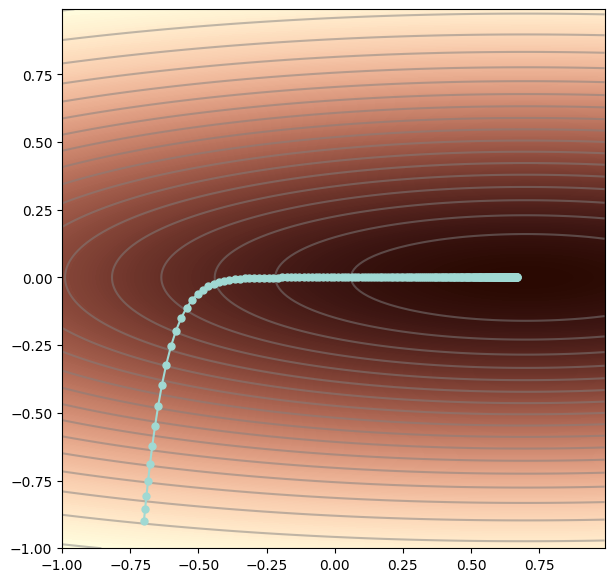

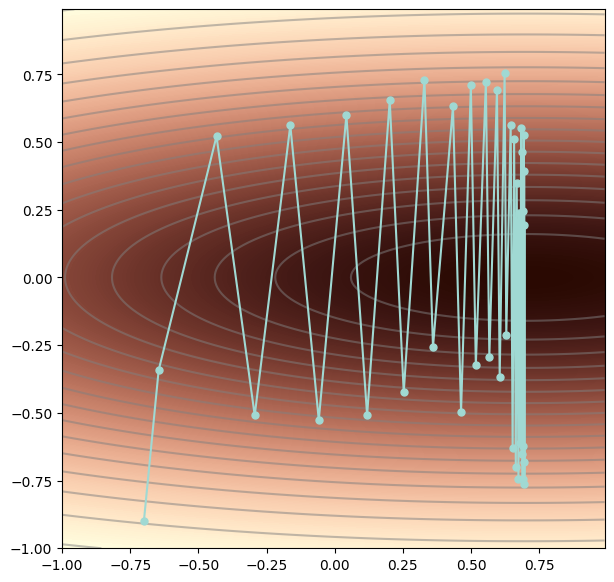

In [5]:
loss_function, phi0mesh, phi1mesh = get_loss_function_for_plot() ;

start_posn = np.zeros((2,1));
start_posn[0,0] = -0.7; start_posn[1,0] = -0.9

# Run gradient descent
grad_path1 = grad_descent(start_posn, n_steps=200, alpha = 0.08)
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path1)
grad_path2 = grad_descent(start_posn, n_steps=40, alpha= 1.0)
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path2)

In [6]:
def normalized_gradients(start_posn, n_steps, alpha,  epsilon=1e-20):
    grad_path = np.zeros((2, n_steps+1));
    grad_path[:,0] = start_posn[:,0];
    for c_step in range(n_steps):
        # Measure the gradient (m) as in equation 6.13 (first line)
        m = get_loss_gradient(grad_path[0,c_step], grad_path[1,c_step]);
        
        # We square each element of the gradient vector
        v = m * m
        # theta_t+1 = theta_t - alpha * m / (sqrt(v) + epsilon)
        # epsilon prevents division by zero
        grad_path[:,c_step+1] = grad_path[:,c_step] - alpha * m / (np.sqrt(v) + epsilon)

    return grad_path;

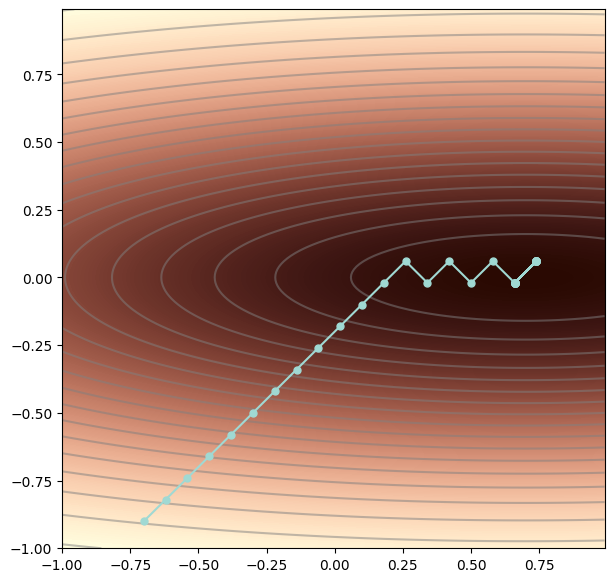

In [7]:
start_posn = np.zeros((2,1));
start_posn[0,0] = -0.7; start_posn[1,0] = -0.9

# Run gradient descent
grad_path1 = normalized_gradients(start_posn, n_steps=40, alpha = 0.08)
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path1)

In [8]:
def adam(start_posn, n_steps, alpha, beta=0.9, gamma=0.99, epsilon=1e-20):
    grad_path = np.zeros((2, n_steps+1));
    grad_path[:,0] = start_posn[:,0];
    m = np.zeros_like(grad_path[:,0])
    v = np.zeros_like(grad_path[:,0])
    
    for c_step in range(n_steps):
        # Measure the gradient
        grad = get_loss_gradient(grad_path[0,c_step], grad_path[1,c_step])
        
        # 1. Update the momentum-based gradient estimate (Equation 6.15, first line)
        m = beta * m + (1 - beta) * grad

        # 2. Update the momentum-based squared gradient estimate (Equation 6.15, second line)
        v = gamma * v + (1 - gamma) * (grad**2)

        # 3. Bias correction (Equation 6.16)
        # We use (c_step + 1) because the first step is t=1
        m_tilde = m / (1 - np.power(beta, c_step + 1))
        v_tilde = v / (1 - np.power(gamma, c_step + 1))

        # 4. Apply the update rule (Equation 6.17)
        # Moving in the direction of m_tilde, scaled by sqrt of v_tilde
        grad_path[:,c_step+1] = grad_path[:,c_step] - alpha * m_tilde / (np.sqrt(v_tilde) + epsilon)

    return grad_path

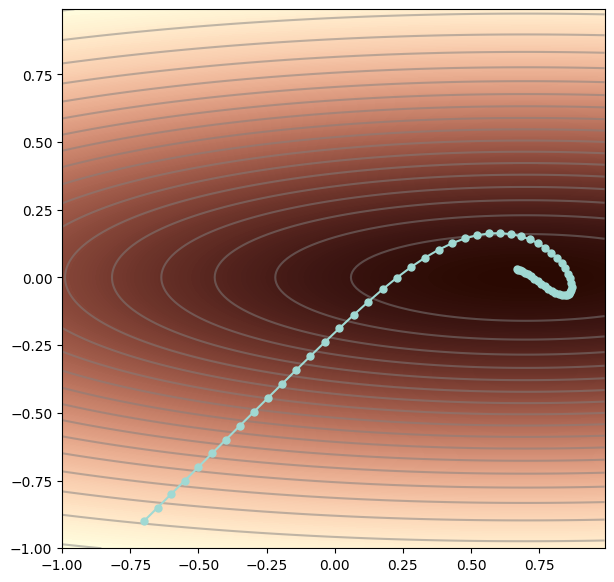

In [9]:
start_posn = np.zeros((2,1));
start_posn[0,0] = -0.7; start_posn[1,0] = -0.9

# Run gradient descent
grad_path1 = adam(start_posn, n_steps=60, alpha = 0.05)
draw_function(phi0mesh, phi1mesh, loss_function, my_colormap, grad_path1)